In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded
from scipy.fftpack import dst, idst
from matplotlib.animation import FuncAnimation
import random as rand

# Universal Electric Potential Field Solver

#### Brayden Freitas, Emily Richards, Gabe Hofferman

Electric potential fields are importeant in predicting many things within physics and related fields, esspecially in regards to the trajectories of charged particles. 

The electric potential field $V$ from any arbitray charge distribution is dictated by Poisson's equation, which in two dimensions is: $$\nabla^2 V = -\frac{\rho}{\epsilon}.$$ 

When the charge density is 0 (as in the case of finding the potential between charged objects), this becomes Laplace's equation, which we write using the second-order differential operator of the laplacian instead of $\nabla^2$ to indicate that we will be more focused on the PDE aspect of the solution than the calculus aspect: $$\Delta V=0$$ which can be viewed as a basic Green's theorem problem for a harmonic function, with the boundary conditions $D$ and $\delta D$ illustrated below.

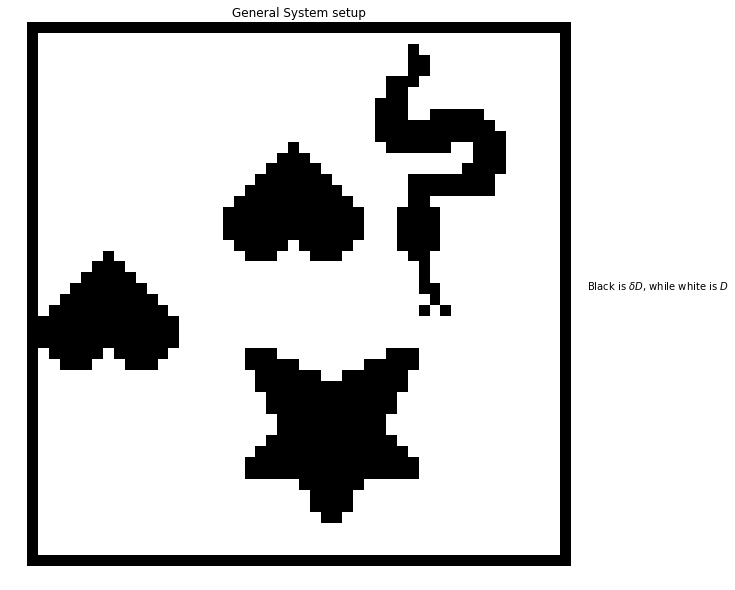

In [2]:
def cArys(x,y):
    V=np.zeros((x,y))
    TF=np.ones((x,y),dtype=bool)
    Fy=np.zeros((1,y),dtype=bool)
    Fx=np.zeros((1,x),dtype=bool)
    TF[0]=TF[x-1]=Fy
    TF.T[0]=TF.T[y-1]=Fx
    return V,TF

def bgArys(ind,rot,pot):
    if ind==0:
        A=[[0,0,pot,pot,pot,0,0,0,pot,pot,pot,0,0],
           [0,pot,pot,pot,pot,pot,0,pot,pot,pot,pot,pot,0],
           [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
           [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
           [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
           [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
           [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
           [0,0,0,pot,pot,pot,pot,pot,pot,pot,0,0,0],
           [0,0,0,0,pot,pot,pot,pot,pot,0,0,0,0],
           [0,0,0,0,0,pot,pot,pot,0,0,0,0,0],
           [0,0,0,0,0,0,pot,0,0,0,0,0,0]]
        return rota(np.array(A),rot)
    if ind==1:
        A=[[0,0,0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot],
          [0,0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot],
          [0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot],
          [0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0],
          [0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0,0],
          [0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0,0,0],
          [0,0,pot,pot,0,0,0,pot,pot,pot,pot,pot,0,0,0,0],
          [0,0,pot,pot,pot,0,pot,pot,pot,pot,pot,0,0,0,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,pot,0,0,0,0,0,0],
          [0,0,0,0,pot,pot,pot,pot,pot,0,0,0,0,0,0,0],
          [0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,0,0,0,0,0,0,0],
          [0,0,pot,pot,pot,0,0,pot,pot,pot,0,0,0,0,0,0],
          [pot,pot,pot,pot,0,0,0,0,pot,pot,0,0,0,0,0,0],
          [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,0,0,0]]
        return rota(np.array(A),rot)
    if ind==2:
        A=[[0,0,0,0,0,0,0,pot,pot,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0],
          [0,0,0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0],
          [0,0,0,0,0,pot,pot,pot,pot,pot,pot,0,0,0,0,0],
          [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
          [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
          [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
          [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
          [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
          [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
          [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
          [0,pot,pot,pot,pot,pot,pot,0,0,pot,pot,pot,pot,pot,pot,0],
          [pot,pot,pot,pot,pot,0,0,0,0,0,0,pot,pot,pot,pot,pot],
          [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==3:
        A=[[0,0,0,0,0,pot,0,pot,0,0,0,0],
        [0,0,0,0,0,0,pot,0,0,0,0,0],
        [0,0,0,0,0,0,pot,pot,0,0,0,0],
        [0,0,0,0,0,0,0,pot,0,0,0,0],
        [0,0,0,0,0,0,0,pot,0,0,0,0],
        [0,0,0,0,0,0,0,pot,pot,0,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,0,pot,pot,0,0,0],
        [0,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
        [0,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
        [pot,pot,pot,pot,0,0,0,0,0,0,0,0],
        [pot,pot,pot,0,0,0,0,0,0,0,0,0],
        [pot,pot,pot,0,0,pot,pot,pot,pot,pot,pot,0],
        [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
        [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
        [0,0,pot,pot,pot,pot,pot,0,0,pot,pot,pot],
        [0,0,0,0,0,0,0,0,0,pot,pot,pot],
        [0,0,0,0,0,0,0,0,0,pot,pot,0],
        [0,0,0,0,0,0,0,0,pot,pot,pot,0],
        [0,0,0,0,0,0,0,pot,pot,0,0 ,0],
        [0,0,0,0,0,0,0,pot,pot,0,0 ,0],
        [0,0,0,0,0,0,0,0,pot,0,0 ,0]]
        return rota(np.array(A),rot)
    return False

def rota(A,rot):
    for n in range(0,rot):
        A=np.rot90(A)
    return A

def insrt(xi,yi,A,V,TF):
    lx,ly=np.shape(A)
    if np.all(TF[xi:xi+lx,yi:yi+ly]==True):
        V[xi:xi+lx,yi:yi+ly]=A
        TF[xi:xi+lx,yi:yi+ly]=(A==0)
        return False
    else:
        return True
    
def genInit(x,y,nSmall,minPot,maxPot):
    V,TF=cArys(x,y)
    for n in range(nSmall):
        check=True
        while check:
            ind=rand.randint(0,3)
            rot=rand.randint(0,3)
            pot=rand.uniform(minPot,maxPot)
            A=bgArys(ind,rot,pot)
            xi=rand.randint(0,x-1)
            yi=rand.randint(0,y-1)
            check=insrt(xi,yi,A,V,TF)
    TF=np.logical_not(TF)
    return V,TF

V,TF=genInit(50,50,4,-5,5)
plt.figure(figsize=(10,10))
plt.title("General System setup")
plt.imshow(TF.T,cmap="binary",origin="lower")
plt.axis("off")
plt.text(51,25,"Black is $\delta D$, while white is $D$")
plt.show()

Where the above system is described as $$\left\{\begin{align*}
\Delta V(\vec{x}) &= 0  &\vec{x}\in D  \\
V(\vec{x})&= f &\vec{x}\in\delta D
\end{align*}\right..$$

Because of this, the Mean-Value Property can be applied, which states that: $$\forall \: \vec{x_o}\in D, V(\vec{x_0})=\frac{1}{|\delta B_r(\vec{x_0})|}\iint_{\delta B_r(\vec{x_0})}V(\vec{x})\:d\vec{S},$$
or rather, that the value of $V$ at any point $\vec{x_0}$ in $D$ is dependent upon the average of all the points equidistant from $\vec{x_0}$, represedented by a ball centered at $\vec{x_0}$ called $\delta B_r(\vec{x_0})$. The benefit of this is that it is possible to discretize the system, treating the whole system $\bar{D}=D\cup\delta D$ as an array of the size $i,j$ called $\bar{D_{ij}}$. While $\delta B_r(\vec{x_0})$ is **any** set of points equidistant from $\vec{x_0}$, $\delta B_1(\vec{x_0})$ is the set of 4 points directly adjacent to $\vec{x_0}$, and as such is the smallest possible set of $\delta B_r(\vec{x_0})$ in $\bar{D_{ij}}$ which is not just $\{\vec{x_0}\}$.

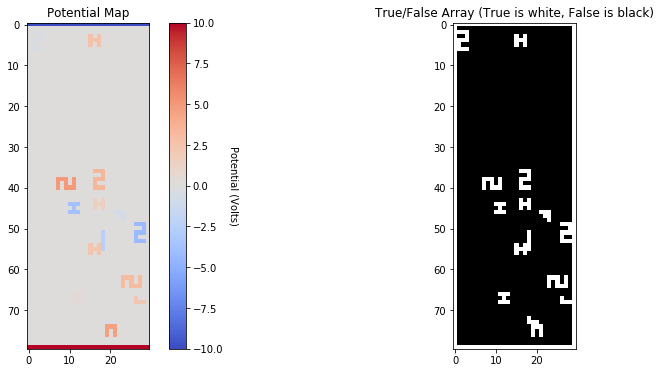

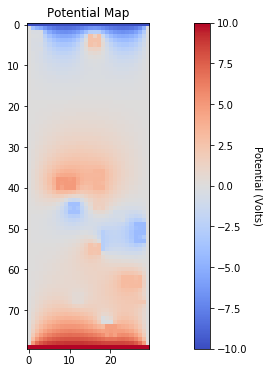

In [3]:
def cArysPore(x,y,Vn,Vp):
    V=np.zeros((x,y))
    TF=np.ones((x,y),dtype=bool)
    Fy=np.zeros((1,y),dtype=bool)
    Fx=np.zeros((1,x),dtype=bool)
    Vp=Vp*np.ones((1,y))
    Vn=Vn*np.ones((1,y))
    TF[0]=TF[x-1]=Fy
    TF.T[0]=TF.T[y-1]=Fx
    V[0]=Vn
    V[-1]=Vp
    return V,TF

def smArys(ind,rot,pot):
    if ind==0:
        A=[[pot,pot,0],[pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==1:
        A=[[pot,pot,pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==2:
        A=[[pot,pot,pot],[0,0,pot],[pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==3:
        A=[[pot,pot,pot,0,pot],[pot,0,pot,0,pot],[pot,0,pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==4:
        A=[[pot,pot,pot],[0,pot,pot],[0,0,pot]]
        return rota(np.array(A),rot)
    if ind==5:
        A=[[pot,0,pot],[pot,pot,pot],[pot,0,pot]]
        return rota(np.array(A),rot)
    if ind==6:
        A=[[0,pot],[0,pot],[pot,pot]]
        return rota(np.array(A),rot)
    return False
        
def genPore(x,y,nSmall,minPot,maxPot,Vn,Vp):
    V,TF=cArysPore(x,y,Vn,Vp)
    for n in range(nSmall):
        check=True
        while check:
            ind=rand.randint(0,6)
            rot=rand.randint(0,3)
            pot=rand.uniform(minPot,maxPot)
            A=smArys(ind,rot,pot)
            xi=rand.randint(0,x-1)
            yi=rand.randint(0,y-1)
            check=insrt(xi,yi,A,V,TF)
    TF=np.logical_not(TF)
    return V,TF

##########################################################################################################

V,TF=genPore(80,30,15,-5,5,-10,10)
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title("Potential Map")
plt.imshow(V,cmap="coolwarm")
cbar=plt.colorbar()
cbar.set_label("Potential (Volts)", rotation=270,labelpad=15)
plt.subplot(122)
plt.title("True/False Array (True is white, False is black)")
plt.imshow(TF,cmap="gray")
plt.show()
##########################################################################################################

V_plot=V.copy()
dif= 1
tol= 10**-3

i=0
while dif >= tol:
    i+=1
    V_plot_last = V_plot.copy()
    left = np.roll(V_plot, 1, axis=1)
    right = np.roll(V_plot, -1, axis=1)
    above = np.roll(V_plot, -1, axis=0)
    below = np.roll(V_plot, 1, axis=0)
    V_plot[1:-1, 1:-1] = 0.25*(left[1:-1, 1:-1] + right[1:-1, 1:-1] +above[1:-1, 1:-1] + below[1:-1, 1:-1])
    
    np.add(V_plot, -V_plot, out=V_plot, where =TF)
    np.add(V_plot, V, out=V_plot, where =TF)
    dif = np.max(abs(V_plot_last-V_plot))
plt.figure(figsize=(16,6))
plt.title("Potential Map")
plt.imshow(V_plot,cmap="coolwarm")
cbar=plt.colorbar()
cbar.set_label("Potential (Volts)", rotation=270,labelpad=15)
